In [1]:
import json
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import mplhep as mh

from hist.hist import Hist
from hist.axis import Regular

In [2]:
def get_eff(path_tnp, path_geom, path_roll_blacklist, where="barrel"):
    '''
    load geometry from path
    '''
    geom = pd.read_csv(path_geom)


    '''
    load roll_blacklist from path
    '''
    with open(path_roll_blacklist) as stream:
        roll_blacklist = set(json.load(stream))


    '''
    load hist data from path
    '''
    h_total = uproot.open(f"{path_tnp}:total").to_hist()
    h_passed = uproot.open(f"{path_tnp}:passed").to_hist()

    total = h_total.values()
    passed = h_passed.values()

    eff = np.divide(passed, total, out=np.zeros_like(total), where=(total > 0))

    roll_axis = h_total.axes[0]
    roll_name_list = [roll_axis.value(idx) for idx in range(roll_axis.size)]

    is_barrel = np.vectorize(lambda item: item.startswith('W'))

    barrel_mask = is_barrel(roll_name_list)
    endcap_mask = np.logical_not(barrel_mask)

    is_whitelist = np.vectorize(lambda item: item not in roll_blacklist)
    whitelist_mask = is_whitelist(roll_name_list)

    '''
    select region from function arg: where
    '''
    if where == "barrel":
        eff = eff[barrel_mask & whitelist_mask] * 100
    if where == "endcap":
        eff = eff[endcap_mask & whitelist_mask] * 100
    if where == "total":
        eff = eff[whitelist_mask] * 100
    return eff


In [5]:
path_tnp = 'data/Run2022.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "endcap"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)

eff_entries = len(eff)
eff_mean = eff.mean()
eff_rms = eff.std()

underflow_70 = len(eff[eff < 70])
over_70_mean = eff[eff > 70].mean()
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

print(eff_mean)
print(over_70_mean)

93.35350250836437
94.5098958686284


/tmp/ipykernel_3338151/2223465181.py:93: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig("./plot/Barrel_Run3.pdf")
/tmp/ipykernel_3338151/2223465181.py:94: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig("./plot/Barrel_Run3.png")


1020


/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


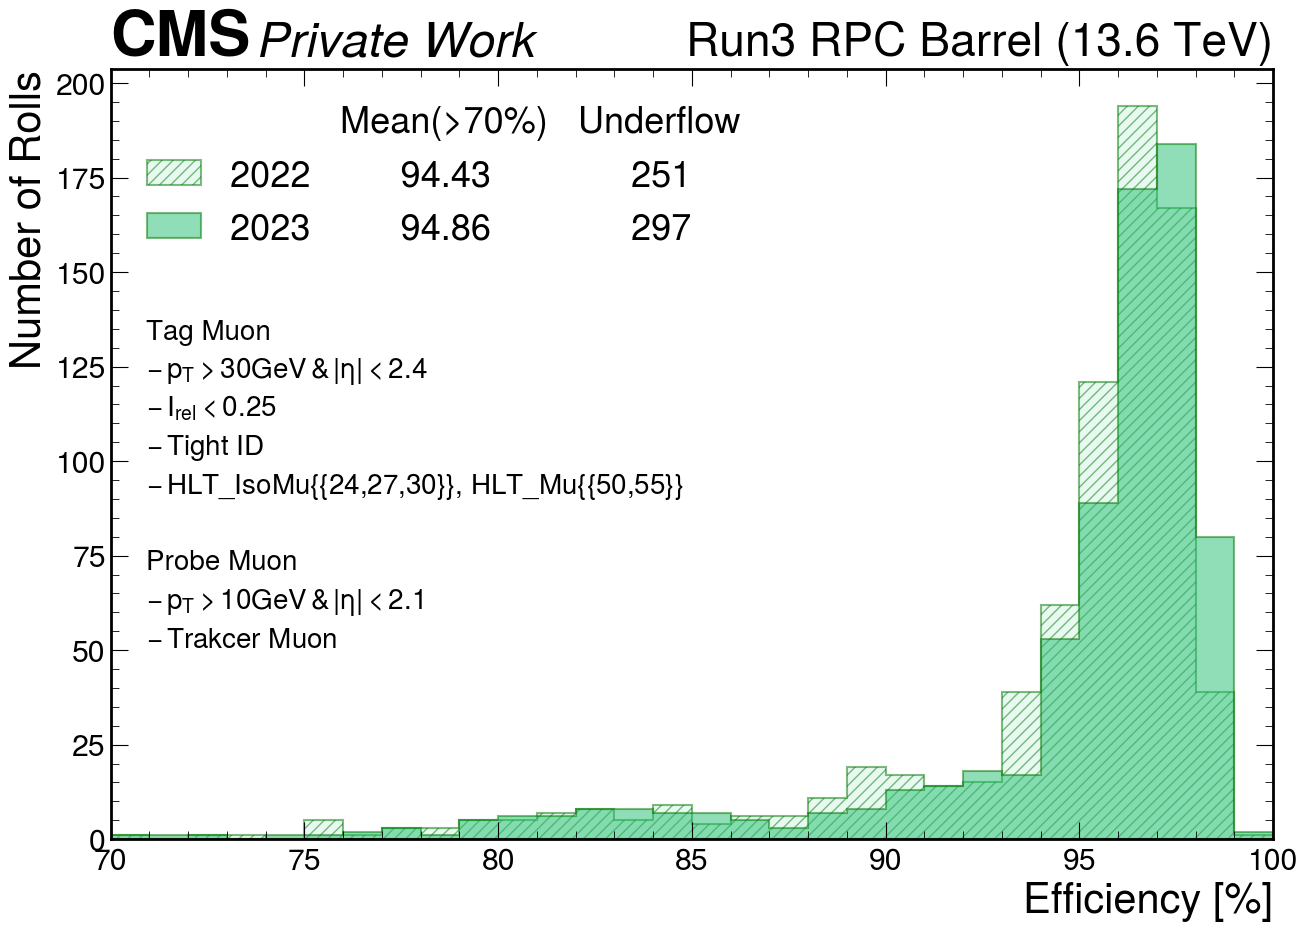

In [10]:
### Figure Common Part
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="Run3 RPC Barrel", fontsize=35)

ax.set_xlabel('Efficiency [%]', fontsize=30)
ax.set_ylabel('Number of Rolls', fontsize=30)
ax.set_xlim(70, 100)
ax.plot(np.NaN, np.NaN, '-', color="None", label="           Mean(>70%)   Underflow")

x0 = 0.03
y0 = 0.65
y1 = 0.35
dy = 0.05

ax.annotate(r'Tag Muon', xy=(x0, y0), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,p_T>30GeV\,&\,|\eta|<2.4$', xy=(x0, y0 - dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,I_{rel}<0.25$', xy=(x0, y0 - 2*dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$Tight ID', xy=(x0, y0 - 3*dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$HLT_IsoMu{{24,27,30}}, HLT_Mu{{50,55}}', xy=(x0, y0 - 4*dy), xycoords='axes fraction', fontsize=20)

ax.annotate(r'Probe Muon', xy=(x0, y1), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,p_T>10GeV\,&\,|\eta|<2.1$', xy=(x0, y1 - dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$Trakcer Muon', xy=(x0, y1 - 2*dy), xycoords='axes fraction', fontsize=20)

### Figure Data1
path_tnp = 'data/Run2022.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "barrel"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)

eff_entries = len(eff)
eff_mean = eff.mean()
eff_rms = eff.std()

underflow_70 = len(eff[eff < 70])
over_70_mean = eff[eff > 70].mean()
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#d3f5e4"
edgecolor = "#007700"

h_eff[70j::10j].plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    facecolor=facecolor,
    edgecolor=edgecolor,
    linewidth=1.5,
    flow=None,
    label=f"2022         {over_70_mean:.2f}              {underflow_70}\t ",
    alpha=0.5,
    hatch="///"
)


### Figure Data2
path_tnp = 'data/Run2023.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "barrel"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)

eff_entries = len(eff)
eff_mean = eff.mean()
eff_rms = eff.std()

underflow_70 = len(eff[eff < 70])
over_70_mean = eff[eff > 70].mean()
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = '#21bf70',
edgecolor = '#007700',

h_eff[70j::10j].plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    facecolor=facecolor,
    edgecolor=edgecolor,
    linewidth=1.5,
    flow=None,
    label=f"2023         {over_70_mean:.2f}              {underflow_70}\t ",
    alpha=0.5
)

ax.legend(fontsize="26")
fig.savefig("./plot/Barrel_Run3.pdf")
fig.savefig("./plot/Barrel_Run3.png")

print(eff_entries)

/tmp/ipykernel_1333/3375276767.py:94: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig("./output/Endcap_Run3.pdf")
/tmp/ipykernel_1333/3375276767.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig("./output/Endcap_Run3.png")


1728


/home/sourcemaru/.miniconda3/envs/ds4hep/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/sourcemaru/.miniconda3/envs/ds4hep/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


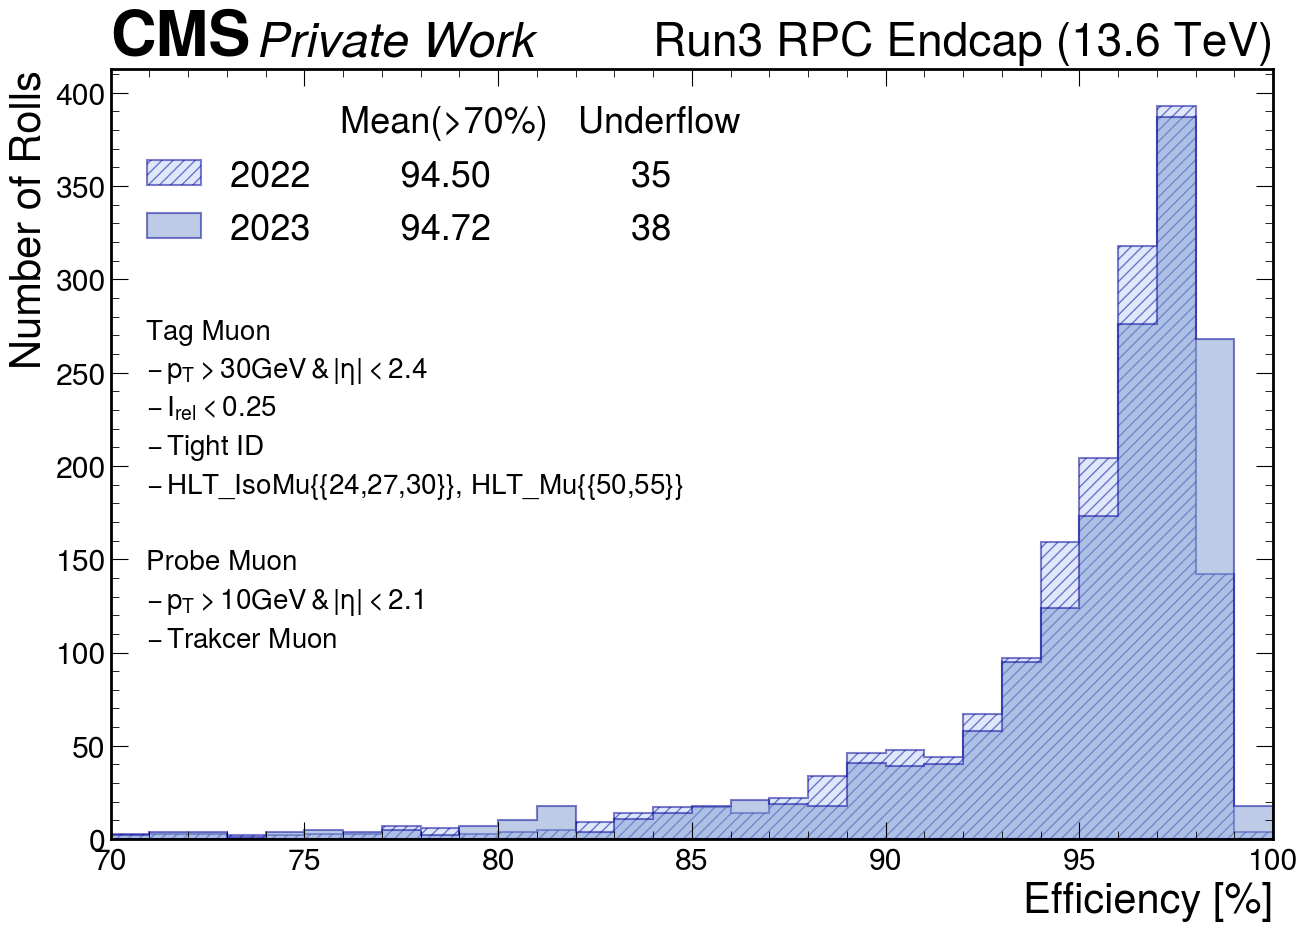

In [13]:
### Figure Common Part
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="Run3 RPC Endcap", fontsize=35)

ax.set_xlabel('Efficiency [%]', fontsize=30)
ax.set_ylabel('Number of Rolls', fontsize=30)
ax.set_xlim(70, 100)
ax.plot(np.NaN, np.NaN, '-', color="None", label="           Mean(>70%)   Underflow")

x0 = 0.03
y0 = 0.65
y1 = 0.35
dy = 0.05

ax.annotate(r'Tag Muon', xy=(x0, y0), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,p_T>30GeV\,&\,|\eta|<2.4$', xy=(x0, y0 - dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,I_{rel}<0.25$', xy=(x0, y0 - 2*dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$Tight ID', xy=(x0, y0 - 3*dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$HLT_IsoMu{{24,27,30}}, HLT_Mu{{50,55}}', xy=(x0, y0 - 4*dy), xycoords='axes fraction', fontsize=20)

ax.annotate(r'Probe Muon', xy=(x0, y1), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,p_T>10GeV\,&\,|\eta|<2.1$', xy=(x0, y1 - dy), xycoords='axes fraction', fontsize=20)
ax.annotate(r'$-\,$Trakcer Muon', xy=(x0, y1 - 2*dy), xycoords='axes fraction', fontsize=20)

### Figure Data1
path_tnp = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2022.root'
path_geom = '../data/rpc-geometry.csv'
path_roll_blacklist = '../data/roll-blacklist.json'
where = "endcap"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)

eff_entries = len(eff)
eff_mean = eff.mean()
eff_rms = eff.std()

underflow_70 = len(eff[eff < 70])
over_70_mean = eff[eff > 70].mean()
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#bed2f7"
edgecolor = "#000099"

h_eff[70j::10j].plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    facecolor=facecolor,
    edgecolor=edgecolor,
    linewidth=1.5,
    flow=None,
    label=f"2022         {over_70_mean:.2f}              {underflow_70}\t ",
    alpha=0.5,
    hatch="///"
)


### Figure Data2
path_tnp = '/home/sourcemaru/OneDrive/RPC/TnP/Workspace/data/tnp-nanoaod-flatten/Run2023.root'
path_geom = '../data/rpc-geometry.csv'
path_roll_blacklist = '../data/roll-blacklist.json'
where = "endcap"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)

eff_entries = len(eff)
eff_mean = eff.mean()
eff_rms = eff.std()

underflow_70 = len(eff[eff < 70])
over_70_mean = eff[eff > 70].mean()
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = '#7c99d1',
edgecolor = '#000099',

h_eff[70j::10j].plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    facecolor=facecolor,
    edgecolor=edgecolor,
    linewidth=1.5,
    flow=None,
    label=f"2023         {over_70_mean:.2f}              {underflow_70}\t ",
    alpha=0.5
)

ax.legend(fontsize="26")

fig.savefig("./output/Endcap_Run3.pdf")
fig.savefig("./output/Endcap_Run3.png")

print(eff_entries)
